## Libraries 

In [1]:
import numpy as np

## Task 1

In [2]:
def fasta_reader(path_to_file):
    '''
    Generator which reads FASTA file and outputs record id (starting from '>' character) and sequence 
    :param path_to_file: str, path to FASTA file
    :return id, seq: record id and sequence
    '''
    
    # some check for valid format
    with open(path_to_file, 'r') as handle:
        for line in handle:
            if line[0] != '>':
                raise ValueError("Expected FASTA record starting with '>' character")
            break
            
    # generator        
    with open(path_to_file, 'r') as handle:   
        title, lines = None, []
        for line in handle:
            if line[0] == '>' and title is None:
                title = line[1:].rstrip()
            elif line[0] == '>':
                yield title, ''.join(lines)
                title, lines = line[1:].rstrip(), []
            else:
                lines.append(line.rstrip())
        yield title, ''.join(lines)

In [3]:
reader = fasta_reader('../data/sequences.fa')
print(type(reader))
for id_, seq in reader:
    print(id_, seq[:30], sep='\t')

<class 'generator'>
Seq1	ATGTCAGACCAACAAAATCAAGACCAAGGG
Seq2	ATGTCGGAGGAAGATCAAATTCAATCGCAA
Seq3	ATGTCGGATTCAAACCAAGGCAACAATCAG
Seq4	ATGTCGGATTCAAACCAAGGTAACAATCAG
Seq5	ATGTCTGATTCAAACCAAGGTAATAATCAG
Seq6	ATGTCAGATCCAAATCAAGGTAACAATCAA
Seq7	ATGTCGGATTCAAACCAAGGCAACAATCAG
Seq8	CCAGCAATACAGCCAGAACGGTAACCAACA
Seq9	ATGTCTGATCCAACTAATGGTAATAATGAG
Seq10	ATGTCTGATCCAAACCAAGGTAACAATCAG


Check that our function can handle exceptions connected with mistakes in FASTA format (if record id is absent or does not start with '>' character)

In [4]:
! head -2 ../data/sequences_broken.fa

ATGTCAGACCAACAAAATCAAGACCAAGGGCAAGGCCAAGGTTACAATCAGTATAACCAATATGGCCAGT
ACAACCAGTACTACAACCAACAGGGCTATCAAGGCTACAACGGCCAACAAGGTGCTCCTCAAGGCTACCA


In [5]:
reader = fasta_reader('../data/sequences_broken.fa')
print(type(reader))
for id_, seq in reader:
    print(id_, seq[:30], sep='\t')

<class 'generator'>


ValueError: Expected FASTA record starting with '>' character

## Task 2

In [6]:
class FastaReader:
    '''
    Class for reading sequences from FASTA file and outputing them 
    with some changes in infinite cycle
    '''
    
    alphabet_nt = ['A', 'T', 'C', 'G']
    
    alphabet_aa = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 
                   'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    
    def __init__(self, path_to_file, seq_type, probs, seq_size=None):
        '''
        Constructor
        
        :param path_to_file: str, path to FASTA file
        :param seq_type: str, type of input data ('nt' or 'aa') for nucleotide 
                              and amino acid sequences respectively
        :param probs: list, probabilities for substitution, insertion and deletion
        :param seq_size: int, number of first letters of initial sequnece to work with
        '''
        
        self.path_to_file = path_to_file
        self.probs = probs
        self.seq_size = seq_size
        if seq_type == 'aa':
            self.alphabet = self.alphabet_aa
        elif seq_type == 'nt':
            self.alphabet = self.alphabet_nt
  

    def fasta_reader(self):
        '''    
        Generator which reads FASTA file and outputs record id 
        (starting from '>' character) and sequence 
        '''
        # some check for valid format
        with open(self.path_to_file, 'r') as handle:
            for line in handle:
                if line[0] != '>':
                    raise ValueError("Expected FASTA record starting with '>' character")
                break

        # generator        
        with open(self.path_to_file, 'r') as handle:   
            title, lines = None, []
            for line in handle:
                if line[0] == '>' and title is None:
                    title = line[1:].rstrip()
                elif line[0] == '>':
                    yield title, ''.join(lines)
                    title, lines = line[1:].rstrip(), []
                else:
                    lines.append(line.rstrip())
            yield title, ''.join(lines)
       
    
    def change_seq(self, seq):
        '''
        Change input sequence, introducing substitution, insertion 
        or deletion into random position
        '''
        
        mutation = np.random.choice(['substitution', 'insertion', 'deletion'], p=self.probs)
        index = np.random.choice(range(len(seq)))
        if mutation == 'substitution':
            letter_to_change = seq[index]
            available_letters = list(set(self.alphabet)-set(letter_to_change))
            change = np.random.choice(available_letters)
        elif mutation == 'insertion':
            change = np.random.choice(self.alphabet)
        elif mutation == 'deletion':
            change = ''
        seq_changed = seq[:index] + change + seq[index+1:]
        
        return seq_changed
    
    
    def display_changed_seq(self):
        '''
        Iterate through FASTA file and output record id 
        (starting from '>' character) and changed sequence 
        '''
        
        while True:
            reader = self.fasta_reader()
            for id_, seq in reader:
                if self.seq_size is None:
                    seq_changed = self.change_seq(seq=seq)
                else:
                    seq_changed = self.change_seq(seq=seq[:self.seq_size])
                print(id_, seq_changed, sep='\t')
            print()
            
            
    def __repr__(self):
        message  = f'''
                Class {self.__class__.__name__} 
                
                Change sequences with following probabilities:
                substitution = {self.probs[0]},
                insertion = {self.probs[1]},
                deletion = {self.probs[2]}
                '''
        return message

**Validation on nucleotide sequneces**

In [7]:
my_reader_nt = FastaReader('../data/sequences.fa', 'nt', [0.5, 0.25, 0.25], seq_size=5)
my_reader_nt


                Class FastaReader 
                
                Change sequences with following probabilities:
                substitution = 0.5,
                insertion = 0.25,
                deletion = 0.25
                

In [8]:
my_reader_nt.display_changed_seq()

Seq1	ATTTC
Seq2	ATGCC
Seq3	CTGTC
Seq4	AAGTC
Seq5	ATGTC
Seq6	ATTC
Seq7	ACGTC
Seq8	CTAGC
Seq9	ATGC
Seq10	AAGTC

Seq1	CTGTC
Seq2	ATTTC
Seq3	TTGTC
Seq4	ACGTC
Seq5	CTGTC
Seq6	AGTC
Seq7	ATGTC
Seq8	CTAGC
Seq9	ATCTC
Seq10	AGTC

Seq1	ATGTT
Seq2	ATTC
Seq3	ATGCC
Seq4	ATGTT
Seq5	AAGTC
Seq6	AAGTC
Seq7	TGTC
Seq8	CTAGC
Seq9	ATGGC
Seq10	ATGC

Seq1	GTGTC
Seq2	TTGTC
Seq3	ATGC
Seq4	ATGGC
Seq5	ATGAC
Seq6	AGTC
Seq7	AGGTC
Seq8	CCAG
Seq9	ATGTA
Seq10	ATGC

Seq1	GTGTC
Seq2	AGGTC
Seq3	CTGTC
Seq4	ATGTA
Seq5	AGTC
Seq6	ATGGC
Seq7	AAGTC
Seq8	CCAG
Seq9	ATGTG
Seq10	ATTC

Seq1	ATGGC
Seq2	ATGAC
Seq3	ATGTC
Seq4	CTGTC
Seq5	ATCTC
Seq6	TGTC
Seq7	ACGTC
Seq8	CTAGC
Seq9	GTGTC
Seq10	AGGTC

Seq1	ATCTC
Seq2	ATGTT
Seq3	ATGTT
Seq4	ATGC
Seq5	ATGTT
Seq6	ATGC
Seq7	ATCTC
Seq8	CCAGC
Seq9	AAGTC
Seq10	ATGCC

Seq1	ATGAC
Seq2	ATATC
Seq3	CTGTC
Seq4	GTGTC
Seq5	ATATC
Seq6	ATGAC
Seq7	AGTC
Seq8	CCAGT
Seq9	ATGT
Seq10	CTGTC

Seq1	TGTC
Seq2	ATTTC
Seq3	CTGTC
Seq4	ATGGC
Seq5	AAGTC
Seq6	ATGAC
Seq7	GTGTC
Seq8	CTAGC
Seq9	CTGTC
Seq10	CTGTC

Seq1	TTGTC
S

Seq1	ATGT
Seq2	GTGTC
Seq3	ATTC
Seq4	ATGTT
Seq5	GTGTC
Seq6	ATGTT
Seq7	AGTC
Seq8	CCGGC
Seq9	ATGCC
Seq10	ATTTC

Seq1	ATGTT
Seq2	CTGTC
Seq3	ATGGC
Seq4	ATTTC
Seq5	ACGTC
Seq6	ATGT
Seq7	ATCTC
Seq8	CCAGG
Seq9	AGGTC
Seq10	ATGCC

Seq1	ATGTT
Seq2	AAGTC
Seq3	ACGTC
Seq4	ATGAC
Seq5	ATGTT
Seq6	ATTTC
Seq7	ATGTT
Seq8	TCAGC
Seq9	ATGTG
Seq10	ATTC

Seq1	ATGTG
Seq2	TGTC
Seq3	ATGC
Seq4	ATGT
Seq5	ATTC
Seq6	TGTC
Seq7	ATGC
Seq8	CCGC
Seq9	ATGT
Seq10	ATTC

Seq1	ATATC
Seq2	ATGT
Seq3	ATGTT
Seq4	ATGCC
Seq5	ATCTC
Seq6	ATGT
Seq7	ATTTC
Seq8	ACAGC
Seq9	ATTC
Seq10	ATGT

Seq1	ATGCC
Seq2	ATCTC
Seq3	ATCTC
Seq4	TTGTC
Seq5	ATGAC
Seq6	ATTC
Seq7	CTGTC
Seq8	TCAGC
Seq9	ACGTC
Seq10	TTGTC

Seq1	ATCTC
Seq2	ATGTG
Seq3	ATGTG
Seq4	ATGAC
Seq5	ATGTC
Seq6	AGGTC
Seq7	ATGTA
Seq8	ACAGC
Seq9	GTGTC
Seq10	ATGAC

Seq1	ATGTC
Seq2	AGGTC
Seq3	ATTTC
Seq4	GTGTC
Seq5	ATGC
Seq6	TTGTC
Seq7	AAGTC
Seq8	CCAAC
Seq9	ATGAC
Seq10	ATGT

Seq1	AGTC
Seq2	ATTC
Seq3	ACGTC
Seq4	ATGGC
Seq5	ATGTC
Seq6	ATGAC
Seq7	CTGTC
Seq8	CCACC
Seq9	ATGC
Seq10	ATGC

Seq1	ATGT
Seq2	AC

Seq1	ATGCC
Seq2	AAGTC
Seq3	AAGTC
Seq4	ACGTC
Seq5	ATGAC
Seq6	ATGC
Seq7	ATGTT
Seq8	CCAGC
Seq9	ATGTC
Seq10	ATTTC

Seq1	ATGGC
Seq2	GTGTC
Seq3	ATGTC
Seq4	ATGAC
Seq5	ATGT
Seq6	CTGTC
Seq7	CTGTC
Seq8	CCGC
Seq9	ATTC
Seq10	ATGGC

Seq1	ATGT
Seq2	ATGTC
Seq3	CTGTC
Seq4	ATGTT
Seq5	GTGTC
Seq6	AGTC
Seq7	AGGTC
Seq8	CGAGC
Seq9	ATGGC
Seq10	ATTC

Seq1	ATTTC
Seq2	ATGTT
Seq3	ATTTC
Seq4	AGTC
Seq5	ATATC
Seq6	ATTTC
Seq7	ATTC
Seq8	ACAGC
Seq9	ATGT
Seq10	ATTC

Seq1	ATTTC
Seq2	ATGC
Seq3	TTGTC
Seq4	AGTC
Seq5	ATTC
Seq6	AGGTC
Seq7	ATGTT
Seq8	CCAC
Seq9	ATGCC
Seq10	AGTC

Seq1	ACGTC
Seq2	ATATC
Seq3	ATGTC
Seq4	ATTC
Seq5	ATTTC
Seq6	ATGT
Seq7	ATCTC
Seq8	CAGC
Seq9	TTGTC
Seq10	ATGGC

Seq1	AAGTC
Seq2	ATGC
Seq3	TTGTC
Seq4	AAGTC
Seq5	AGGTC
Seq6	AAGTC
Seq7	ATGGC
Seq8	CCATC
Seq9	ATGAC
Seq10	ATGCC

Seq1	ATGAC
Seq2	TTGTC
Seq3	ATATC
Seq4	ATGTG
Seq5	ATATC
Seq6	ATGTC
Seq7	ATGC
Seq8	CCAG
Seq9	ATGTT
Seq10	ATGT

Seq1	ATTC
Seq2	ATATC
Seq3	ATATC
Seq4	AGTC
Seq5	AGGTC
Seq6	ATCTC
Seq7	ACGTC
Seq8	CCAAC
Seq9	GTGTC
Seq10	ATGTA

Seq1	AGTC
Seq2	TT

Seq8	CAAGC
Seq9	GTGTC
Seq10	TGTC

Seq1	ATGT
Seq2	ATCTC
Seq3	ATGTT
Seq4	ACGTC
Seq5	ACGTC
Seq6	ATTTC
Seq7	ATATC
Seq8	ACAGC
Seq9	ATATC
Seq10	ATGTT

Seq1	ACGTC
Seq2	AGGTC
Seq3	ACGTC
Seq4	ATGTC
Seq5	AGGTC
Seq6	TGTC
Seq7	ACGTC
Seq8	CCAG
Seq9	AAGTC
Seq10	GTGTC

Seq1	ATGTA
Seq2	ATATC
Seq3	ATGTG
Seq4	ATGTC
Seq5	TGTC
Seq6	ATGGC
Seq7	ATGCC
Seq8	TCAGC
Seq9	AGTC
Seq10	ATGC

Seq1	AAGTC
Seq2	ATGTT
Seq3	ATGAC
Seq4	TTGTC
Seq5	ACGTC
Seq6	AGTC
Seq7	GTGTC
Seq8	CCAAC
Seq9	ATGTC
Seq10	ATGCC

Seq1	AGTC
Seq2	ATGC
Seq3	ACGTC
Seq4	ATTTC
Seq5	ATTTC
Seq6	AAGTC
Seq7	ATATC
Seq8	CCAG
Seq9	ACGTC
Seq10	ATATC

Seq1	CTGTC
Seq2	ATGTA
Seq3	CTGTC
Seq4	ATCTC
Seq5	ATGC
Seq6	CTGTC
Seq7	TGTC
Seq8	CCTGC
Seq9	CTGTC
Seq10	ATGCC

Seq1	AGTC
Seq2	AGGTC
Seq3	ATTC
Seq4	ATTC
Seq5	AGGTC
Seq6	ATGTA
Seq7	ATGTT
Seq8	CAGC
Seq9	ATTTC
Seq10	CTGTC

Seq1	CTGTC
Seq2	ATATC
Seq3	AGGTC
Seq4	ATGAC
Seq5	ACGTC
Seq6	ATTTC
Seq7	TGTC
Seq8	CCATC
Seq9	TTGTC
Seq10	TTGTC

Seq1	TGTC
Seq2	ATTTC
Seq3	ATGC
Seq4	ATGT
Seq5	AGGTC
Seq6	ACGTC
Seq7	ATGTG
Seq8	CCACC
Se

KeyboardInterrupt: 

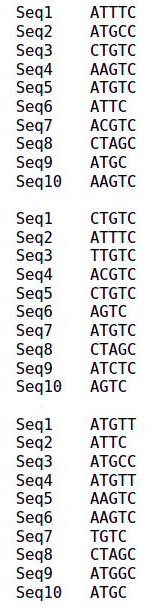

**Validation on amino acid sequences**

In [9]:
my_reader_aa = FastaReader('../data/sequences.faa', 'aa', [0.80, 0.10, 0.10], seq_size=5)
my_reader_aa.display_changed_seq()

Seq1	DYNPQ
Seq2	YVFKY
Seq3	SLAA
Seq4	KFEQG
Seq5	CKLCR
Seq6	ETLQ
Seq7	GDSVV
Seq8	HNMNK
Seq9	PCSHG
Seq10	VEDDL

Seq1	DNPPQ
Seq2	YFFIY
Seq3	SLAAS
Seq4	GFEKG
Seq5	CKLAQ
Seq6	LQTLQ
Seq7	GDSGI
Seq8	HNMPV
Seq9	ACSHH
Seq10	AELDL

Seq1	DYPPE
Seq2	YFFKD
Seq3	SLADD
Seq4	KMEKG
Seq5	CELAR
Seq6	LETVQ
Seq7	GDSGV
Seq8	GNMPK
Seq9	ACSYG
Seq10	VELHL

Seq1	DYPQ
Seq2	YDFKY
Seq3	DLAAD
Seq4	KFIKG
Seq5	CHLAR
Seq6	LETLT
Seq7	GDNGV
Seq8	HHMPK
Seq9	ACSSG
Seq10	VETDL

Seq1	DYPPW
Seq2	YFFKQ
Seq3	SLAD
Seq4	KFEKM
Seq5	GKLAR
Seq6	LETAQ
Seq7	GDEGV
Seq8	HNYPK
Seq9	ACSHA
Seq10	VELDK

Seq1	DYPDQ
Seq2	YFFCY
Seq3	SLAED
Seq4	FEKG
Seq5	CKPAR
Seq6	LEGLQ
Seq7	GNSGV
Seq8	WNMPK
Seq9	ACVHG
Seq10	VELCL

Seq1	DYRPQ
Seq2	YFFKA
Seq3	SLGAD
Seq4	KFTKG
Seq5	CILAR
Seq6	LETCQ
Seq7	DSGV
Seq8	HNMDK
Seq9	ARSHG
Seq10	VELRL

Seq1	DRPPQ
Seq2	YFFKD
Seq3	SLAED
Seq4	KFEKS
Seq5	CKLAE
Seq6	LYTLQ
Seq7	VDSGV
Seq8	NMPK
Seq9	WCSHG
Seq10	VELDR

Seq1	DPPPQ
Seq2	YFFKC
Seq3	SPAAD
Seq4	RFEKG
Seq5	CKLAL
Seq6	LETLR
Seq7	GISGV
Seq8	HGMPK
Seq9	ACAHG
Seq10	VELD



Seq10	CELDL

Seq1	RYPPQ
Seq2	YEFKY
Seq3	SSAAD
Seq4	KFEKD
Seq5	CKFAR
Seq6	PETLQ
Seq7	GDSGH
Seq8	PNMPK
Seq9	AKSHG
Seq10	VELDE

Seq1	DYPPY
Seq2	YFFK
Seq3	SLAAK
Seq4	KFEKF
Seq5	CKTAR
Seq6	LTLQ
Seq7	GDSMV
Seq8	HMPK
Seq9	ARSHG
Seq10	VKLDL

Seq1	DYPP
Seq2	YLFKY
Seq3	SLAYD
Seq4	KFEAG
Seq5	PKLAR
Seq6	LETRQ
Seq7	GDGV
Seq8	HNQPK
Seq9	ACVHG
Seq10	YELDL

Seq1	DYPVQ
Seq2	YFFTY
Seq3	SLAAK
Seq4	KFEWG
Seq5	CKLAT
Seq6	TETLQ
Seq7	GPSGV
Seq8	HNMPL
Seq9	ACWHG
Seq10	VELDS

Seq1	DKPPQ
Seq2	YFDKY
Seq3	SLAAK
Seq4	KFEG
Seq5	DKLAR
Seq6	LETGQ
Seq7	GSGV
Seq8	VNMPK
Seq9	ACSRG
Seq10	VELHL

Seq1	DYPNQ
Seq2	YFNKY
Seq3	SLAID
Seq4	KLEKG
Seq5	QKLAR
Seq6	LYTLQ
Seq7	GDFGV
Seq8	HDMPK
Seq9	ICSHG
Seq10	VGLDL

Seq1	CYPPQ
Seq2	YFCKY
Seq3	SDAAD
Seq4	KFEKM
Seq5	CKLAC
Seq6	LETNQ
Seq7	GDSGR
Seq8	RNMPK
Seq9	ASHG
Seq10	VELDA

Seq1	DYPLQ
Seq2	YFFY
Seq3	SLAAG
Seq4	KFEK
Seq5	HKLAR
Seq6	AETLQ
Seq7	GWSGV
Seq8	HNMPS
Seq9	ACSG
Seq10	VVLDL

Seq1	DYPIQ
Seq2	YFFTY
Seq3	SGAAD
Seq4	FFEKG
Seq5	CKAR
Seq6	LELQ
Seq7	GDGV
Seq8	HEMPK
Seq9	ACSKG
Seq10	

Seq1	DYPTQ
Seq2	HFFKY
Seq3	DLAAD
Seq4	KFEK
Seq5	CKLPR
Seq6	LETMQ
Seq7	GDAGV
Seq8	HNMPT
Seq9	AESHG
Seq10	SELDL

Seq1	RYPPQ
Seq2	YFKY
Seq3	SAAD
Seq4	KFEKC
Seq5	CKRAR
Seq6	IETLQ
Seq7	GDSDV
Seq8	NMPK
Seq9	AASHG
Seq10	TELDL

Seq1	DYPTQ
Seq2	YDFKY
Seq3	SLAAA
Seq4	KFDKG
Seq5	CKDAR
Seq6	LELQ
Seq7	GDAGV
Seq8	NMPK
Seq9	YCSHG
Seq10	VGLDL

Seq1	DYPP
Seq2	YFCKY
Seq3	SKAAD
Seq4	KTEKG
Seq5	CKLIR
Seq6	PETLQ
Seq7	QDSGV
Seq8	CNMPK
Seq9	ACHG
Seq10	VELDR

Seq1	DYPPH
Seq2	YFFYY
Seq3	SLAMD
Seq4	KFAKG
Seq5	WKLAR
Seq6	LKTLQ
Seq7	GDQGV
Seq8	HNMPC
Seq9	ACSHN
Seq10	VYLDL

Seq1	DYLPQ
Seq2	IFFKY
Seq3	SLAAN
Seq4	AFEKG
Seq5	TKLAR
Seq6	LETLV
Seq7	GDSV
Seq8	HDMPK
Seq9	ALSHG
Seq10	VELSL

Seq1	DDPPQ
Seq2	YFFQY
Seq3	SLAAM
Seq4	VFEKG
Seq5	CHLAR
Seq6	LETKQ
Seq7	DSGV
Seq8	HNLPK
Seq9	ACSEG
Seq10	SELDL

Seq1	IYPPQ
Seq2	YEFKY
Seq3	SLASD
Seq4	KEEKG
Seq5	CALAR
Seq6	LDTLQ
Seq7	DSGV
Seq8	HNMVK
Seq9	ACSHA
Seq10	VELDK

Seq1	DYPEQ
Seq2	YFHKY
Seq3	SAAD
Seq4	SFEKG
Seq5	CKLIR
Seq6	LETRQ
Seq7	GWSGV
Seq8	HNMK
Seq9	ACSNG
Seq10	VELDC

Seq1	

KeyboardInterrupt: 

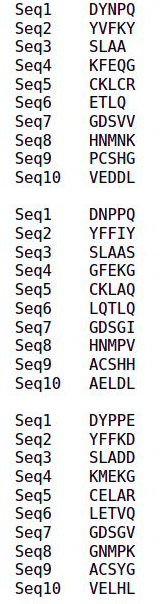

## Task 3

In [10]:
def iter_append(iterable, item):
    '''
    Append item to the end of itearble object.
    So, during iterations we will, firstly, obtain data from iterable and only then form item
    
    :param iterable: some iterable object
    :param item: object to append to iterable
    :return: generator
    '''
    
    iterable = list(iterable)
    if iterable:
        yield iterable.pop(0)
        yield from iter_append(iterable, item)
    else:
        yield item

In [11]:
generator = iter_append([1, 2, 3, 4], "ABCD")
print(type(generator))

for i in generator:
    print(i)

<class 'generator'>
1
2
3
4
ABCD


In [12]:
filt = filter(lambda x: x % 2 == 0, [1, 2, 3, 4])
generator = iter_append(filt, [5, 6, 7, 8])
print(type(generator))

for i in generator:
    print(i)

<class 'generator'>
2
4
[5, 6, 7, 8]


## Task 4

In [13]:
def my_generator(iterable):
    '''
    Unpack elements of nested list and return them.
    
    :param iterable: nested list to unpack
    :return: generator
    '''
    
    if iterable:
        if isinstance(iterable[0], list):
            yield from my_generator(iterable[0])
        else:
            yield iterable[0]
        yield from my_generator(iterable[1:])
        
        
def nested_list_unpacker(iterable):
    '''
    Unpack elements of nested list into a new one
    
    :param iterable: nested list to unpack
    :return: unpacked list
    '''
    
    generator = my_generator(iterable=iterable)
    return [i for i in generator]

In [14]:
nested_list_unpacker([1, 2, 3, [1, 2, [3, 4, []], [1], [], 12, 3], [1, [5, 6]]])

[1, 2, 3, 1, 2, 3, 4, 1, 12, 3, 1, 5, 6]

In [15]:
nested_list_unpacker([[1, 2, 3], [[100, 200], 4, 5]])

[1, 2, 3, 100, 200, 4, 5]